# Preliminary Steps

In [12]:
# Import the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Render visuals inside the notebook

%matplotlib inline

List containing the colours that I will use for the visualisations. The colours hex code and names (brackets indicate which Big 5 Country/League is used with that colour):

• #4382b4 - Python Blue 

• #ff9e1b - McLaren Orange (Spain/LIGA BBVA)

• black (Germany/Bundesliga)

• #ff5aa4 - Bret Hart Pink (Italy)

• #ffd847 - Python Yellow (France/Ligue 1)

• #02addd - Udacity Blue (England/Premier League)

In [13]:
# Colours to use to distinguish between the different leagues
colours_ct = ["#02addd", "#ff9e1b", "black", "#ff5aa4", "#ffd847", "#4382b4"]

## Functions

### load_data()

**load_data()** is a simple function which has 1 parameter, being dataframe. A user passes a string containing the name (and directory if necessary) of the **csv** file that will be loaded into a pandas DataFrame.

To allow multiple DataFrames to be created, and to prevent the overwriting of an existing DataFrame, I have implemented a count system to track the number of times **load_data()** has created a DataFrame. This count system is basically a variable _load_count_ assigned the starting value of 0. Each time **load_data()** is used, the count increases by 1. Once the count reaches 3, **load_data()** will stop creating any new DataFrames.

In [14]:
load_count = 0

In [15]:
def load_data(file_name):
    global load_count
    if load_count == 0:
        global df
        df = pd.read_csv(file_name)
        print("Please use 'df' to refer to the DataFrame.")
    elif load_count == 1:
        global df2
        df2 = pd.read_csv(file_name)
        print("Please use 'df2' to refer to the DataFrame.")
    elif load_count == 2:
        global df3
        df3 = pd.read_csv(file_name)
        print("Please use 'df3' to refer to the DataFrame.")
    elif load_count > 2:
        print("This function creates a maximum of 3 DataFrames, please restart the program.")
    load_count += 1

### column_renamer()

**column_renamer()** has 3 parameters; dataframe, old column name and the new column name. The function body will simply use `.rename()` with the added parameter of `inplace=True` to make the change permanent. Take note that this function can only rename 1 column at a time.

In [16]:
def column_renamer(dataframe, oldname, newname):
    dataframe.rename(columns={oldname : newname}, inplace=True)
    print("Please verify that the renaming is correct:\n")
    print(dataframe.head(2))

### column_dropper()

**column_dropper()** will be quite similar in structure to **column_renamer()**. It will have 2 paremeters; dataframe and the name of the column to be dropped. If the user wants to drop more than 1 column, the column names should passed within a List.

In [17]:
def column_dropper(dataframe, col_name):
    dataframe.drop(col_name, axis=1, inplace=True)
    print("Please verify that the dropping is correct:\n")
    print(dataframe.head(2))

# Questions

## Match Data

1. What's the distribution of the goals scored per match across the Big 5 Leagues, also what is the distribution of goals for the English, Italian and Spanish leagues?

2. Which league scored the most number of goals over the period covered by the data? 

3. Has the total number of goals scored per league changed or remained consistent over the period covered by the data?

## Player Data

1. What is the relationship between a player's height and their average FIFA rating?

2. In terms of percentage, what is the distribution of left footed versus right footed players?

3. What is the relationship between a player's age and their average FIFA rating?

4. Based on the card rating system in FIFA's ultimate team mode, what is the distribution of rankings across the players in terms of percentage?

# Wrangling the Data

In [18]:
# loading the Match Data
load_data("big5.csv")

Please use 'df' to refer to the DataFrame.


In [19]:
# loading the Player data
load_data("player_stats.csv")

Please use 'df2' to refer to the DataFrame.


## Match Data

First, I will modify the _clean_date_ column to convert the data type into that of a datetime type.

In [20]:
# Converting the clean_date column in Big5 table into a datetime type
df["clean_date"] = pd.to_datetime(df["clean_date"])

I have also decided to remove some redundant columns in the match dataset, which were carried over from the SQL extraction phase. These columns are _league_ and _date_. The DataFrame contains columns with these values in a much cleaner format.

In [21]:
column_dropper(df, ["league", "date"])

Please verify that the dropping is correct:

   country     clean_league     season clean_date          home_team  \
0  England   Premier League  2008/2009 2008-08-17  Manchester United   
1  England   Premier League  2008/2009 2008-08-16            Arsenal   

              away_team  home_team_goal  away_team_goal  \
0      Newcastle United               1               1   
1  West Bromwich Albion               1               0   

                                       shots_on_goal  \
0  <shoton><value><stats><blocked>1</blocked></st...   
1  <shoton><value><stats><blocked>1</blocked></st...   

                                          possession  
0  <possession><value><comment>56</comment><event...  
1  <possession><value><comment>65</comment><event...  


After the removal of the redundant columns, the existing columns must be renamed to remove the "clean_" portion of their name/label.

In [22]:
column_renamer(df, "clean_league", "league")

Please verify that the renaming is correct:

   country           league     season clean_date          home_team  \
0  England   Premier League  2008/2009 2008-08-17  Manchester United   
1  England   Premier League  2008/2009 2008-08-16            Arsenal   

              away_team  home_team_goal  away_team_goal  \
0      Newcastle United               1               1   
1  West Bromwich Albion               1               0   

                                       shots_on_goal  \
0  <shoton><value><stats><blocked>1</blocked></st...   
1  <shoton><value><stats><blocked>1</blocked></st...   

                                          possession  
0  <possession><value><comment>56</comment><event...  
1  <possession><value><comment>65</comment><event...  


In [24]:
column_renamer(df, "clean_date", "date")

Please verify that the renaming is correct:

   country           league     season       date          home_team  \
0  England   Premier League  2008/2009 2008-08-17  Manchester United   
1  England   Premier League  2008/2009 2008-08-16            Arsenal   

              away_team  home_team_goal  away_team_goal  \
0      Newcastle United               1               1   
1  West Bromwich Albion               1               0   

                                       shots_on_goal  \
0  <shoton><value><stats><blocked>1</blocked></st...   
1  <shoton><value><stats><blocked>1</blocked></st...   

                                          possession  
0  <possession><value><comment>56</comment><event...  
1  <possession><value><comment>65</comment><event...  


### Question 1

For **Question 1**, I need to add the number of goals per match, through a simple arithmetic operation since the goal values are already integers. This will be done through the creation of a new column in the DataFrame called _goals_.

I will then use `.groupby()` to generate a count of the number of goals, which is grouped according to the total amount of goals scored per match.

In [25]:
# Storing the arithmetic operation in a variable to make it easier to work with later
add_goals = df["home_team_goal"] + df["away_team_goal"]

In [26]:
# Using insert() to create a "goals" column to be inserted before "shoton"
df.insert(8, "goals", add_goals)

In [27]:
# Storing the pandas Series in a variable to make it easier to work with later
goals = df.groupby("goals")["date"].count()

For the second part of **Question 1**, I need to filter the DataFrame to only return results (separately) for the English, Italian and Spanish leagues. This will be accomplished using `query()` with the main DataFrame and the appropriate filter.

A separate DataFrame will be created for each filtered DataFrame, so that the results can be easily accessed. Again, `groupby()` will be used to aggregate the data and obtain a count for each league. 

Starting with **England/Premier League**

In [28]:
df_eng = df.query("country == 'England'")

In [29]:
gd_eng = df_eng.groupby("goals")["date"].count()

I encountered a problem when I was inspecting the multi Bar graph. Spain has 11 x axis ticks, while England and Italy have less than 11. This resulted in an incomplete x axis which stopped at 9 (Italy's highest goal distribution amount).

To resolve this, I went back to the England and Italy Series and added the necessary elements with a value of 0 in order for the shape to be compatible.

In [30]:
gd_eng = gd_eng.append(pd.Series([0], index=[11]))

**Spain/LIGA BBVA**

In [31]:
df_spa = df.query("country == 'Spain'")

In [32]:
gd_spa = df_spa.groupby("goals")["date"].count()

**Italy/Serie A**

In [33]:
df_ita = df.query("country == 'Italy'")

In [34]:
gd_ita = df_ita.groupby("goals")["date"].count()

In [35]:
gd_ita = gd_ita.append(pd.Series([0, 0], index=[10, 11]))

### Question 2

Let's see how many goals were scored in each country over the period covered by the data. To do this, I will use `groupby()` again, and aggregate by country/league and use `sum()` to find the total goals scored per country/league.

In [36]:
# Aggregate the data to sum up the total number of goals per country
goals_bc = df.groupby("country")["goals"].sum()

Just something to note, remember that for **Germany/Bundesliga**, there are only 18 teams in the league, while all the other leagues in the Big 5 have 20 teams each. This means that Bundesliga clubs play 4 fewer matches each compared to their Big 5 counterparts.

### Question 3

For this question, I will gather the data for goals scored per country/league for each season covered by dataset. I will conduct this process separately for each country/league. I will then use the separate data and combine them into 1 Line graph.

The filtered DataFrames for England, Italy and Spain already exist at this stage, so all that is required is modifying the `groupby()` statement to group the data by seasons and obtain the total goals per season.

Let's start with **England/Premier League**

In [37]:
# Aggregating the data for England to find the total goals per season
goals_eng = df_eng.groupby("season")["goals"].sum()

**Spain/LIGA BBVA**.

In [38]:
# Aggregating the data for Spain to find the total goals per season
goals_spa = df_spa.groupby("season")["goals"].sum()

**Italy/Serie A**

In [39]:
# Aggregating the data for Italy to find the total goals per season
goals_ita = df_ita.groupby("season")["goals"].sum()

**France/Ligue 1**

In [40]:
# Filter the data to return only the rows for France/Ligue 1
df_fra = df.query("country == 'France'")

In [41]:
# Aggregating the data for France to find the total goals per season
goals_fra = df_fra.groupby("season")["goals"].sum()

**Germany/Bundesliga**

In [42]:
# Filter the data to return only the rows for Germany/Bundesliga
df_ger = df.query("country == 'Germany'")

In [43]:
# Aggregating the data for France to find the total goals per season
goals_ger = df_ger.groupby("season")["goals"].sum()

Finally, the _shots_on_goal_ and _possession_ columns have too much data in order to be relevant, and it exceeds the level of data wrangling expected at this stage of the course. I will remove these columns using `column_dropper()`.

In [44]:
column_dropper(df, ["shots_on_goal", "possession"])

Please verify that the dropping is correct:

   country           league     season       date          home_team  \
0  England   Premier League  2008/2009 2008-08-17  Manchester United   
1  England   Premier League  2008/2009 2008-08-16            Arsenal   

              away_team  home_team_goal  away_team_goal  goals  
0      Newcastle United               1               1      2  
1  West Bromwich Albion               1               0      1  


## Player Data

I don't need the "fifa_id" column, so I'm going to drop it from the player_stats DataFrame.

In [45]:
column_dropper(df2, "fifa_id")

Please verify that the dropping is correct:

               player           birth_date  height preferred_foot  rating
0  Aaron Appindangoye  1992-02-29 00:00:00   183.0          right    67.0
1  Aaron Appindangoye  1992-02-29 00:00:00   183.0          right    67.0


I will convert the values in _birth_date_ from strings into a datetime object. This is done in preparation of calculating the ages of the players in a later step.

In [46]:
# Converting the birth_date column in player_stats to a datetime type
df2["birth_date"] = pd.to_datetime(df2["birth_date"])

Now I want to remove all the duplicated data so that I am only left with unique values for the following columns:

    • player
    
    • birth_date
    
    • height
    
An issue with the player data is that there are multiple rows which are duplicated, where only the FIFA rating may be different for the same player. I'm going to trim the dataset by only have 1 unique player per row.

In [47]:
# Removing all the duplicated players
df2.drop_duplicates("player", inplace=True)

I am attempting to calculate the age of each player in the DataFrame. As the data is a bit old, I have used a cut-off date of 2019-01-01 as the date which will be used to calculate the age. I have stored this in a variable **age_date** which took that date as a string while converting it into a timestamp object.

In [48]:
age_date = pd.to_datetime("2019-01-01")

In [49]:
# Storing the age calculation expression in a variable to make it easier to use later
age_calc = age_date - df2["birth_date"]

Using `insert()` to create a column called _age_ whose values are calculated via the expression contained in the **age_calc** variable.

In [50]:
df2.insert(2, "age", age_calc)

This outputs the age in days. I need to convert it into years. This (below) will convert the age from days into years.


In [51]:
df2["age"] = df2["age"].astype('timedelta64[Y]')

I don't need the _birth_date_ column any longer, so I can drop it.

In [52]:
column_dropper(df2, "birth_date")

Please verify that the dropping is correct:

               player   age  height preferred_foot  rating
0  Aaron Appindangoye  26.0   183.0          right    67.0
5     Aaron Cresswell  29.0   170.0           left    74.0


### Question 1

**What is the relationship between a player's height and their average FIFA rating?**

For this question, I need to create a Scatter Plot graph. The independent variable will be **height**, while the dependent variable will be **rating**. 

I will aggregate the player data by grouping by _height_ and then calculating the average/mean rating for each _height_ value in the dataset.

In [53]:
df2_hr = df2.groupby("height")["rating"].mean()

### Question 2

**In terms of percentage, what is distribution of left footed versus right footed players?**

For this question, I need to work with percentages, that means I need to a total count of the players in general, and a total count of left and right footed players. I then need to use Arithmetic Operators to obtain the percentage and then transfer this information onto a Bar graph.

In [54]:
# Storing the total count of players in a variable
total = len(df2)

In [55]:
# Getting a count of players according to preferred_foot
df2_pf = df2.groupby("preferred_foot")["player"].count()

**Left Footed Players**

In [56]:
# Filtering the series to access only the value for left footers
left_pf = df2_pf.loc["left"]

In [57]:
# Storing the percentage value, rounded to 2 decimal places, in a variable
left_pct = round((left_pf / total) * 100, 2)

**Right Footed Players**

In [58]:
# Filtering the series to access only the value for right footers
right_pf = df2_pf.loc["right"]

In [59]:
# Storing the percentage value, rounded to 2 decimal places, in a variable
right_pct = round((right_pf / total) * 100, 2)

### Question 3

**What is the relationship between a player's age and their average FIFA rating?**

This similar to the question regarding the relationship between height and average FIFA rating. I will approach it in a similar way.

In [60]:
df2_ar = df2.groupby("age")["rating"].mean()

### Question 4

**Based on the card rating system in FIFA's ultimate team mode, what is the distribution of rankings across the players in terms of percentage?**

For this question, I need to categorise quantitative data (player ratings) into different categoreis according to the FIFA Ultimate Team ((**FUT**) rankings found [here](https://www.ea.com/games/fifa/fifa-21/ultimate-team/item-guide).

In terms of the FUT rankings, these are the categories of FUT cards/players:

    • Bronze - Players below a rating of 64
    
    • Silver - Players with a rating between (and including) 65 and 74 (inclusive)
    
    • Gold - PLayers with a rating equal to or greater than (>=) 75 

Using `df["rating"].describe()` to find the **minimum** and **maximum** values for player ratings to see how they line up with the FUT ratings.

In [61]:
df2["rating"].describe()

count    10848.000000
mean        67.931969
std          6.323781
min         42.000000
25%         64.000000
50%         68.000000
75%         72.000000
max         94.000000
Name: rating, dtype: float64

Now I will create the bin edges and bin names that will be used with pandas' `cut()` to categorise quantitative data such as player ratings. 

In [62]:
# Creating a List containing the values that will be used for the FUT categories.
# 42 - Minimum rating
# 64 - highest Bronze rating in FUT
# 74 - highest Silver rating in FUT
# 94 - Maximum rating
bin_edges = [42, 64, 74, 94]

In [63]:
# Creating a List containing the FUT category names
bin_names = ["bronze", "silver", "gold"]

For reference, to answer this question, a new column has to be created, whose values will be made up of one of the List elements stored in **bin_names**. This value will be determined by where exactly each value in the existing column _rating_ falls in the range defined by **bin_edges**.

The syntax/format for using `cut()` for this type of question is:

```dataframe["new column name"] = pd.cut(dataframe["existing column"], bin_edges, labels=bin_names)```

In [64]:
# Creating the new column categorising the quantitative data
df2["fut_category"] = pd.cut(df2["rating"], bin_edges, labels=bin_names)

To answer this question, it would be better to use percentages to obtain a better view of the distribution of bronze, silver and gold players across the dataset. Thus, I will answer this question following the same process as with Question 2, dealing with the distribution of left and right footed players.

In [65]:
# Getting a count of players according to FUT category
df2_fut = df2.groupby("fut_category")["player"].count()

Bronze Players

In [66]:
brz_pl = df2_fut.loc["bronze"]

In [67]:
brz_pct = round((brz_pl / total) * 100, 2)

Silver Players

In [69]:
ag_pl = df2_fut.loc["silver"]

In [70]:
ag_pct = round((ag_pl / total) * 100, 2) 

Gold Players

In [71]:
au_pl = df2_fut.loc["gold"]

In [72]:
au_pct = round((au_pl / total) * 100, 2)

# Visualisations

Take note that the visualisations are split between the **Match** dataset and the **Player** dataset. This section will begin with the **Match** dataset. For ease of reference, the questions will be included for each visualisation.

## Match Data

### Question 1

1. What's the distribution of the goals scored per match across the Big 5 Leagues, also what is the distribution of goals for the English, Italian and Spanish leagues?

**Visualisation Code**

In [74]:
# Creating an array to be used as the x-coordinates in the bar graph
b1_xc_b5 = np.arange(len(goals))

In [75]:
# Storing the Series values to be used as bar heights in the bar graph
b1_bh_b5 = goals.values

In [76]:
# Storing the Series index to be used as the tick labels in the bar graph
b1_tl_b5 = goals.index

Information for storing a plot as a file is found [here](https://futurestud.io/tutorials/matplotlib-save-plots-as-file).

The code below is for the actual visualisation:

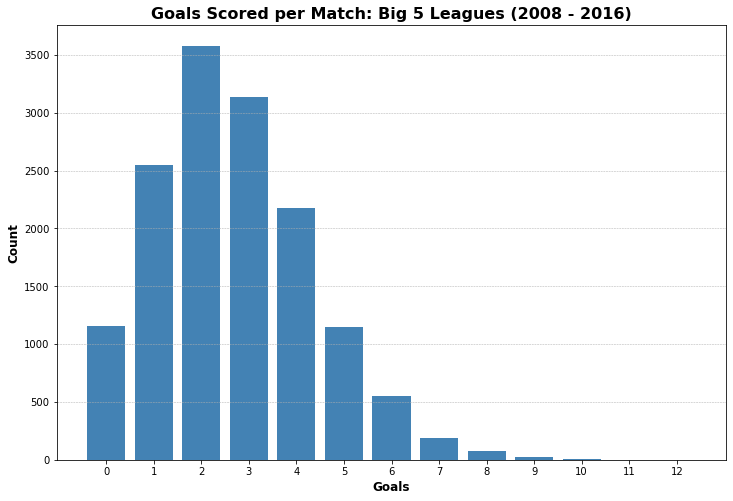

In [77]:
f, ax = plt.subplots(figsize=(12,8))
plt.bar(b1_xc_b5, b1_bh_b5, tick_label=b1_tl_b5, color=colours_ct[5])
plt.title("Goals Scored per Match: Big 5 Leagues (2008 - 2016)", fontsize=16, fontweight="heavy")
plt.xlabel("Goals", fontsize=12, fontweight="heavy")
plt.ylabel("Count", fontsize=12, fontweight="heavy")
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.savefig("goal_distribution_general.png", dpi=300);

As shown by the graph, the data is skewed to the right. The modal goals scored per match is 2 for the Big 5 Leagues for the period covered by the dataset. There were over 1000 matches where no goals were scored by either team.

Let's now look at the same question, but for the top3 leagues only (England, Spain and Italy)

**Visualisation Code**

England/Premier League

In [78]:
br_eng_xc = np.arange(len(gd_eng))

In [79]:
br_eng_bh = gd_eng.values

In [80]:
br_eng_tl = gd_eng.index

Spain/LIGA BBVA

In [81]:
br_spa_xc = np.arange(len(gd_spa))

In [82]:
br_spa_bh = gd_spa.values

In [83]:
br_spa_tl = gd_spa.index

Italy/Serie A

In [84]:
br_ita_xc = np.arange(len(gd_ita))

In [85]:
br_ita_bh = gd_ita.values

In [86]:
br_ita_tl = gd_ita.index

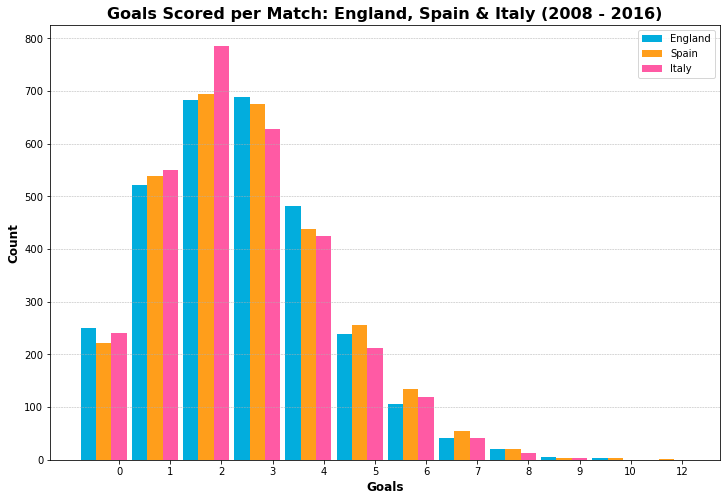

In [87]:
f, ax = plt.subplots(figsize=(12,8))
plt.bar(br_eng_xc, br_eng_bh, tick_label=br_spa_tl, color=colours_ct[0], width=0.3, label="England")
plt.bar(br_spa_xc + 0.3 , br_spa_bh, tick_label=br_spa_tl, color=colours_ct[1], width=0.3, label="Spain")
plt.bar(br_ita_xc + 0.6 , br_ita_bh, tick_label=br_spa_tl, color=colours_ct[3], width=0.3, label="Italy")
plt.title("Goals Scored per Match: England, Spain & Italy (2008 - 2016)", fontsize=16, fontweight="heavy")
plt.xlabel("Goals", fontsize=12, fontweight="heavy")
plt.ylabel("Count", fontsize=12, fontweight="heavy")
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.legend()
plt.savefig("goal_distribution_top3.png", dpi=300);

As this bar graph with indicates, the 3 biggest leagues in Europe all share a similar skewness in terms of the distribution of goals per match over the period covered by the data. The data for all 3 leagues are skewed to the right.

The modal goals scored per match for Italy and Spain is 2. In contrast, the modal goals scored per match for England is 3. Please refer to the country coefficients on the UEFA website for information as to why England, Italy and Spain are considered to be the top 3 leagues in Europe.


### Question 2

2. Which league scored the most number of goals over the period covered by the data? 

**Visualisation Code**

In [88]:
b3_xc_bc = np.arange(len(goals_bc))

In [89]:
b3_bh_bc = goals_bc.values

In [90]:
b3_tl_bc =  goals_bc.index

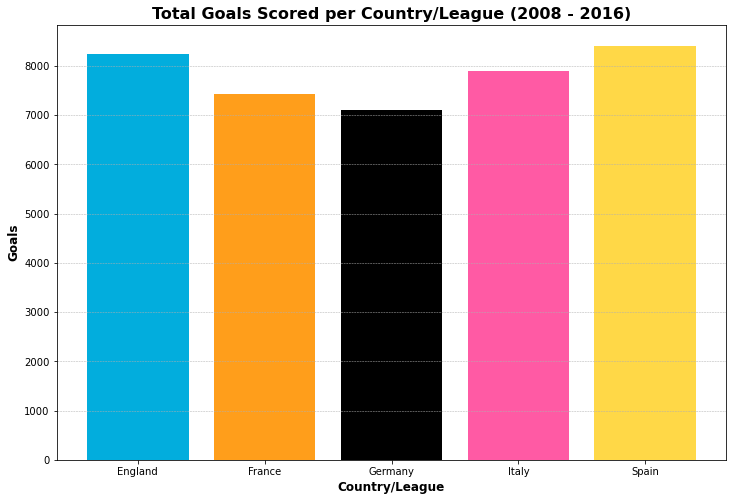

In [91]:
f, ax = plt.subplots(figsize=(12,8))
plt.bar(b3_xc_bc, b3_bh_bc, tick_label=b3_tl_bc, color=colours_ct)
plt.title("Total Goals Scored per Country/League (2008 - 2016)", fontsize=16, fontweight="heavy")
plt.xlabel("Country/League", fontsize=12, fontweight="heavy")
plt.ylabel("Goals", fontsize=12, fontweight="heavy")
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.savefig("total_goals_per_league.png", dpi=300);

As shown by the bar graph, the Spanish LIGA BBVA scored the highest amount of goals during the period covered by the data. Note that, even though Germany's Bundesliga is the lowest scoring league, German teams play 4 fewer matches each per season compared to the teams in other leagues.

### Question 3

3. Has the total number of goals scored per league changed or remained consistent over the period covered by the data?

**Visualisation Code**

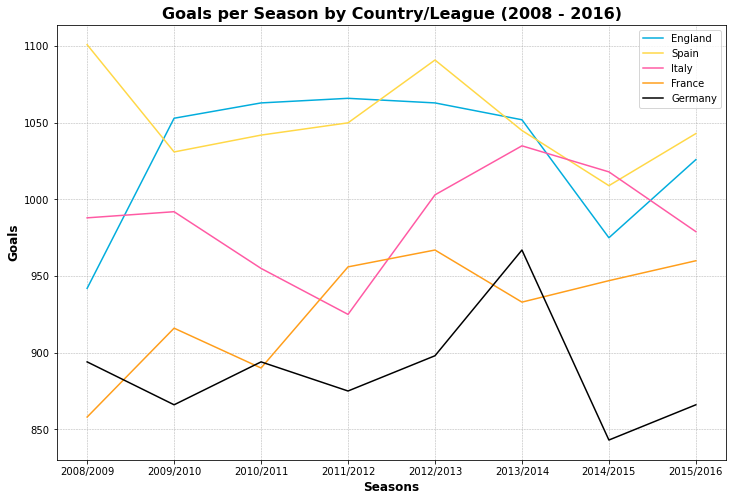

In [92]:
f, ax = plt.subplots(figsize=(12,8))
goals_eng.plot(color=colours_ct[0], label="England")
goals_spa.plot(color=colours_ct[4], label="Spain")
goals_ita.plot(color=colours_ct[3], label="Italy")
goals_fra.plot(color=colours_ct[1], label="France")
goals_ger.plot(color=colours_ct[2], label="Germany")
plt.title("Goals per Season by Country/League (2008 - 2016)", fontsize=16, fontweight="heavy")
plt.xlabel("Seasons", fontsize=12, fontweight="heavy")
plt.ylabel("Goals", fontsize=12, fontweight="heavy")
plt.grid(linestyle="--", linewidth=0.5)
plt.legend()
plt.savefig("total_goals_per_season_by_league.png", dpi=300);

This line graph shows that Spain's LIGA BBVA was the league with the most goals scored in a season, with this occurring in the 2012/2013 season. The English Premier League showed a period of consistency from 2009/10 until 2013/14 with 5 seasons where there were more than 1050 goals scored per season. Apart from this, the general trend for each league was inconsistent, with the total goals scored varying throughout the seasons.

The English Premier League also saw a season-on-season increase of more than 100 goals from 2008/2009 to 2009/2010. The German Bundesliga had the biggest season-on-season decrease of more than 100 goals from the Bundesliga's high point in 2013/2014 to 2014/2015.

However, even with each Bundesliga club playing 4 fewer games each season compared to the other clubs in the rest of the leagues, the Bundesliga outscored the French Ligue 1 on 3 occasions, being the 2008/2009, 2010/2011 and 2013/2014 seasons.


## Player Data

### Question 1

1. What is the relationship between a player's height and their average FIFA rating?

**Visualisation Code**

In [93]:
# Getting the x axis values (player height)
sp_x_ph = np.array(df2_hr.index)

In [94]:
# Getting the y axis values (player rating)
sp_y_pr = df2_hr.values

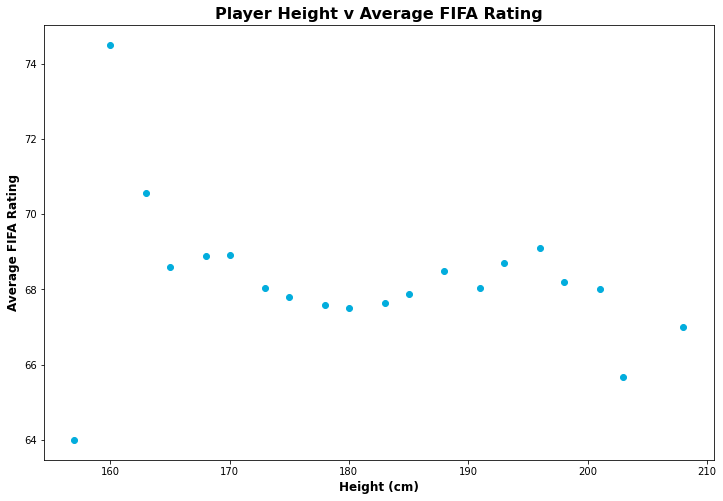

In [95]:
f, ax = plt.subplots(figsize=(12,8))
plt.scatter(sp_x_ph, sp_y_pr, color=colours_ct[0])
plt.title("Player Height v Average FIFA Rating", fontsize=16, fontweight="heavy")
plt.xlabel("Height (cm)", fontsize=12, fontweight="heavy")
plt.ylabel("Average FIFA Rating", fontsize=12, fontweight="heavy")
plt.savefig("height_v_rating_scatter.png", dpi=300);

It appears that there is moderate negative relationship/correlation between height and average FIFA rating according to the scatter plot above. Apart from a few outliers, it appears that as a player's height increases, the average rating for that height decreases.

## Question 2

2. In terms of percentage, what is the distribution of left footed versus right footed players?

**Visualisation Code**

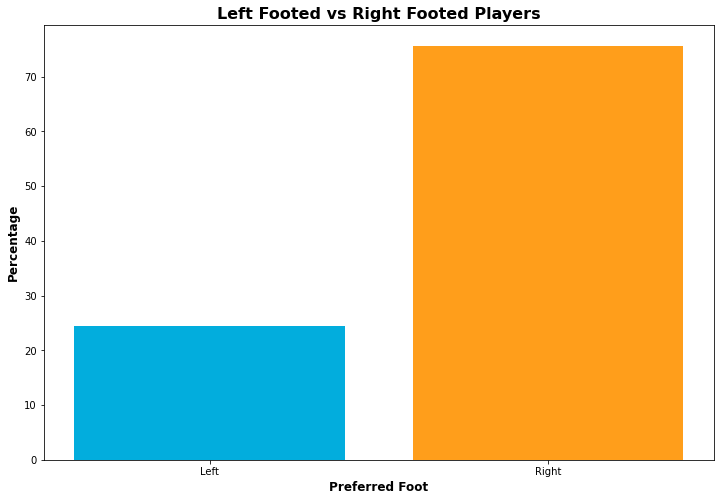

In [96]:
f, ax = plt.subplots(figsize=(12,8))
plt.bar([0, 1], [left_pct, right_pct], tick_label=["Left", "Right"], color=colours_ct[:2])
plt.title("Left Footed vs Right Footed Players", fontsize=16, fontweight="heavy")
plt.xlabel("Preferred Foot", fontsize=12, fontweight="heavy")
plt.ylabel("Percentage", fontsize=12, fontweight="heavy")
plt.savefig("left_v_right_players_bar.png", dpi=300);

As this bar graph shows, there are much more right footed players compared to left footed players for the data contained in the Player Data.

## Question 3

3. What is the relationship between a player's age and their average FIFA rating?

**Visualisation Code**

In [97]:
# Getting the x axis values (player age)
sp2_x_pa = np.array(df2_ar.index)

In [98]:
# Getting the y axis values (player rating)
sp2_y_pr = df2_ar.values

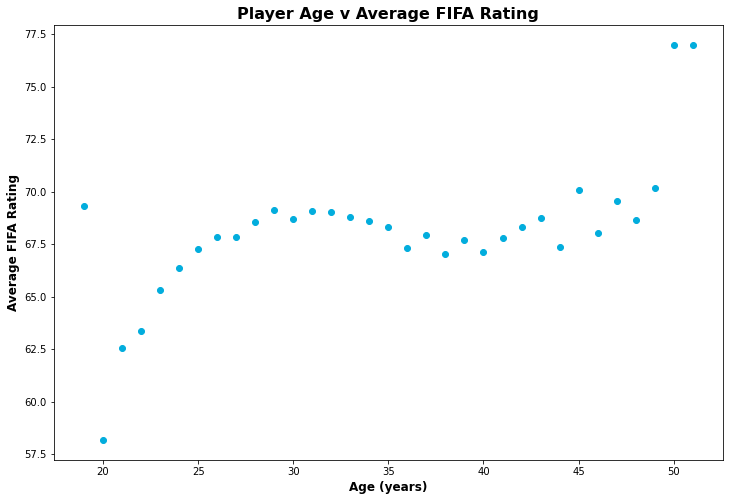

In [99]:
f, ax = plt.subplots(figsize=(12,8))
plt.scatter(sp2_x_pa, sp2_y_pr, color=colours_ct[0])
plt.title("Player Age v Average FIFA Rating", fontsize=16, fontweight="heavy")
plt.xlabel("Age (years)", fontsize=12, fontweight="heavy")
plt.ylabel("Average FIFA Rating", fontsize=12, fontweight="heavy")
plt.savefig("age_v_rating_scatter.png", dpi=300);

This scatter plot seems to indicate that there is a strong relationship/correlation between age and average FIFA rating. It seems that older players have higher average ratings compared to the younger players.

However, it must be noted that the dataset included data on players whose age would usually lead to the assumption that such players are no longer active professional football players. These are players aged 40 and above. A possible explanation could be that FIFA includes game modes which contain players that have actually retired in real life, but are available in the game.


## Question 4

4. Based on the card rating system in FIFA's ultimate team mode, what is the distribution of rankings across the players in terms of percentage?

**Visualisation Code**

In [100]:
# These colours are taken from EA's website, using the dropper function
# #fad491 - Bronze
# #d5d5d5 - Silver
# #f8e28d - Gold
fut_colours = ["#fad491", "#d5d5d5", "#f8e28d"]

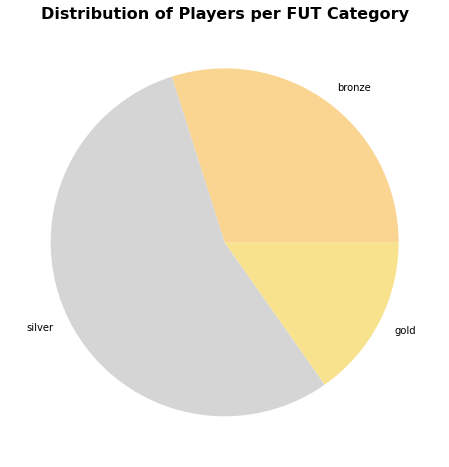

In [101]:
f, ax = plt.subplots(figsize=(12,8))
plt.pie([brz_pct, ag_pct, au_pct], labels=bin_names, colors=fut_colours)
plt.title("Distribution of Players per FUT Category", fontsize=16, fontweight="heavy")
plt.savefig("fut_categories_pie.png", dpi=300);

According to the pie chart above, it appears that FIFA's FUT mode has more than 50% of its players being categorised as Silver level players. Just over a quarter of players are classified as being Bronze level players. Lastly, the remaining percentage of players in FUT are Gold level players.

# Conclusion

## Findings

The data gleaned from the data analysis processes appears to imply the following:

The **Match data** indicates that the modal amount of goals per match is 2. The **Match data** also shows that, for the time period covered by the dataset, Spain’s LIGA BBVA was the league with highest total goals scored. The **Match data** also indicates that each of the B5L have at least 850 goals being scored per season for each league.

The **Player data** seems to establish that there might be a relationship between a player’s age and height and their respective average FIFA rating. However, this is merely tentative or speculative at this stage and further analysis should be done in order to determine whether or not such factors are correlated.

The **Player data** shows that there are more right footed players compared to left footed players. Finally, the Player data also seems to indicate that the majority of the players found in the FUT mode are Silver level players.


## Limitations

At the outset, it must be noted that one of the limitations with the datasets that were used in this data analysis was the fact that a sizeable portion of data was sourced from Electronic Art’s FIFA video games series. While the FIFA data is consistent and easy to understand, the data itself, especially regarding team attributes and player attributes and ratings, are subjective and/or difficult to quantify. Thus this type of data cannot be relied upon to reach any sort of definitive findings.

The statistics used in this data analysis are restricted to being descriptive only. Due to the nature of the data, with a major portion of it being categorical and/or non-quantitative.